# BERT attention heads

Going deeper on the BERT representations.

See:  
https://huggingface.co/transformers/bertology.html

In [22]:
import torch
from transformers import *

# All the classes for an architecture can be initiated from pretrained weights for this architecture
# Note that additional weights added for fine-tuning are only initialized
# and need to be trained on the down-stream task
pretrained_weights = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(pretrained_weights)

# Load pretrained model/tokenizer
model = BertModel.from_pretrained(pretrained_weights)

# Models can return full list of hidden-states & attentions weights at each layer
model = BertModel.from_pretrained(pretrained_weights,
                                  output_hidden_states=True,
                                  output_attentions=True)
input_ids = torch.tensor([tokenizer.encode("joining peace talks between Israel and the Palestinians. The negotiations are")])
all_hidden_states, all_attentions = model(input_ids)[-2:]

### Attention Weights

From: https://huggingface.co/transformers/model_doc/bert.html#bertmodel

**attentions**: Tuple of torch.FloatTensor (one for each layer) of shape (batch_size, num_heads, sequence_length, sequence_length).

Attentions weights after the attention softmax, used to compute the weighted average in the self-attention heads.

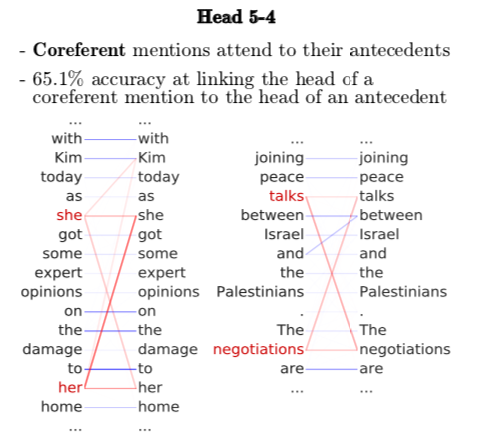

See if we can grab head 5-4...

In [39]:
coref_head = all_attentions[4][0][3]

print(coref_head.shape)

# Look at the references for the two co-referent words:
print("\"Negotiations\" attention weights: \n\t{}".format(coref_head[-2]))

print("\n\"Talks\" attention weights: \n\t{}".format(coref_head[2]))

torch.Size([12, 12])
"Negotiations" attention weights: 
	tensor([0.0180, 0.0123, 0.3793, 0.0214, 0.0043, 0.0070, 0.0026, 0.0116, 0.0046,
        0.0022, 0.5357, 0.0011], grad_fn=<SelectBackward>)

"Talks" attention weights: 
	tensor([1.5396e-02, 2.9177e-03, 5.4983e-01, 2.8408e-03, 3.1879e-04, 5.3173e-04,
        3.1515e-04, 8.3999e-04, 4.0847e-03, 3.0516e-03, 4.1416e-01, 5.7109e-03],
       grad_fn=<SelectBackward>)
